In [1]:
import glob
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
ampscz_scores = pd.read_csv("notebooks/AMPSCZ_scores.csv")
ampscz_scores["sub-ses"] = (
    ampscz_scores["sub_id_gs"].astype(str)
    + "-"
    + ampscz_scores["ses_id_gs"].astype(str)
)
ampscz_scores["scores"] = (
    ampscz_scores["scores"].replace("-", "-1").fillna("-1").astype(int)
)
ampscz_scores["comment"] = ampscz_scores["comment"].fillna("")
ampscz_scores["site"] = ampscz_scores["sub_id_gs"].str[0:2]
ampscz_scores = ampscz_scores[ampscz_scores["scores"] > -1]
ampscz_scores

,sub_id_gs,ses_id_gs,timepoint_gs,scores,comment,sub-ses,site
0,BI02450,202306231,month_2_arm_1,2,"severe ringing, ghosting at eyes, motion",BI02450-202306231,BI
1,BI02450,202304111,baseline_arm_1,3,ringing throughout,BI02450-202304111,BI
3,BI05529,202306051,baseline_arm_2,4,no notable issues,BI05529-202306051,BI
5,BI05652,202304171,baseline_arm_1,3,some ringing/motion in temporal poles,BI05652-202304171,BI
7,BI05874,202305181,baseline_arm_1,3,Some ringing,BI05874-202305181,BI
...,...,...,...,...,...,...,...
1113,YA20849,202308041,baseline_arm_1,3,ringing,YA20849-202308041,YA
1115,YA23168,202308211,baseline_arm_1,4,,YA23168-202308211,YA
1117,YA23568,202308311,baseline_arm_1,3,Minor ringing,YA23568-202308311,YA
1119,YA24934,202308281,baseline_arm_1,4,,YA24934-202308281,YA


In [3]:
finetune_df = pd.read_csv("src/dataset/ampscz/finetune.csv", index_col=0)
pretrain_df = pd.read_csv("src/dataset/ampscz/pretrain.csv", index_col=0)
site_df = pd.read_csv("src/dataset/ampscz/sites.csv", index_col=0)
pretrain_site = site_df[site_df["group"] == "pretrain"]["site"]
pretrain_df

,sub_id_gs,ses_id_gs,timepoint_gs,score,comment,sub-ses,site,motion,group,data
3,BI05529,202306051,baseline_arm_2,4,no notable issues,BI05529-202306051,BI,False,train,AMPSCZ-Preproc/subjects/sub-BI05529/ses-202306...
18,BM13122,202308041,baseline_arm_1,4,"a bit grainy, otherwise fine",BM13122-202308041,BM,False,train,AMPSCZ-Preproc/subjects/sub-BM13122/ses-202308...
21,BM44608,202307181,month_2_arm_1,4,NaN,BM44608-202307181,BM,False,train,AMPSCZ-Preproc/subjects/sub-BM44608/ses-202307...
40,BM99192,202304191,month_2_arm_2,4,NaN,BM99192-202304191,BM,False,train,AMPSCZ-Preproc/subjects/sub-BM99192/ses-202304...
50,CA04203,202304191,baseline_arm_2,4,no notable issues,CA04203-202304191,CA,False,train,AMPSCZ-Preproc/subjects/sub-CA04203/ses-202304...
...,...,...,...,...,...,...,...,...,...,...
1009,TE00307,202210201,baseline_arm_1,4,A little blurry,TE00307-202210201,TE,False,test,AMPSCZ-Preproc/subjects/sub-TE00307/ses-202210...
1010,TE00307,202212151,month_2_arm_1,4,NaN,TE00307-202212151,TE,False,test,AMPSCZ-Preproc/subjects/sub-TE00307/ses-202212...
1036,TE16009,202305311,baseline_arm_1,4,No notable issues,TE16009-202305311,TE,False,test,AMPSCZ-Preproc/subjects/sub-TE16009/ses-202305...
1037,TE16009,202307261,month_2_arm_1,4,no notable issues,TE16009-202307261,TE,False,test,AMPSCZ-Preproc/subjects/sub-TE16009/ses-202307...


In [4]:
data_in_pretrain_site = ampscz_scores[ampscz_scores["site"].isin(pretrain_site)]
data_in_pretrain_site

,sub_id_gs,ses_id_gs,timepoint_gs,scores,comment,sub-ses,site
0,BI02450,202306231,month_2_arm_1,2,"severe ringing, ghosting at eyes, motion",BI02450-202306231,BI
1,BI02450,202304111,baseline_arm_1,3,ringing throughout,BI02450-202304111,BI
3,BI05529,202306051,baseline_arm_2,4,no notable issues,BI05529-202306051,BI
5,BI05652,202304171,baseline_arm_1,3,some ringing/motion in temporal poles,BI05652-202304171,BI
7,BI05874,202305181,baseline_arm_1,3,Some ringing,BI05874-202305181,BI
...,...,...,...,...,...,...,...
1064,WU09592,202212131,baseline_arm_1,4,No notable issues,WU09592-202212131,WU
1065,WU09592,202303301,month_2_arm_1,4,,WU09592-202303301,WU
1066,WU10549,202304051,baseline_arm_1,4,,WU10549-202304051,WU
1067,WU11737,202306291,baseline_arm_1,4,no notable issues,WU11737-202306291,WU


In [5]:
not_used_pretrain = data_in_pretrain_site[
    -data_in_pretrain_site["sub-ses"].isin(pretrain_df["sub-ses"])
]
not_used_pretrain

,sub_id_gs,ses_id_gs,timepoint_gs,scores,comment,sub-ses,site
0,BI02450,202306231,month_2_arm_1,2,"severe ringing, ghosting at eyes, motion",BI02450-202306231,BI
1,BI02450,202304111,baseline_arm_1,3,ringing throughout,BI02450-202304111,BI
5,BI05652,202304171,baseline_arm_1,3,some ringing/motion in temporal poles,BI05652-202304171,BI
7,BI05874,202305181,baseline_arm_1,3,Some ringing,BI05874-202305181,BI
11,BI08676,202306141,baseline_arm_1,4,Negligible ringing,BI08676-202306141,BI
...,...,...,...,...,...,...,...
1034,TE15483,202305091,baseline_arm_1,3,faint ringing,TE15483-202305091,TE
1052,WU01590,202212011,month_2_arm_1,3,moderate ringing,WU01590-202212011,WU
1054,WU04342,202212191,month_2_arm_2,3,motion throughout,WU04342-202212191,WU
1059,WU06851,202212191,month_2_arm_1,4,slight ringing but not significant,WU06851-202212191,WU


<Axes: xlabel='scores', ylabel='Count'>

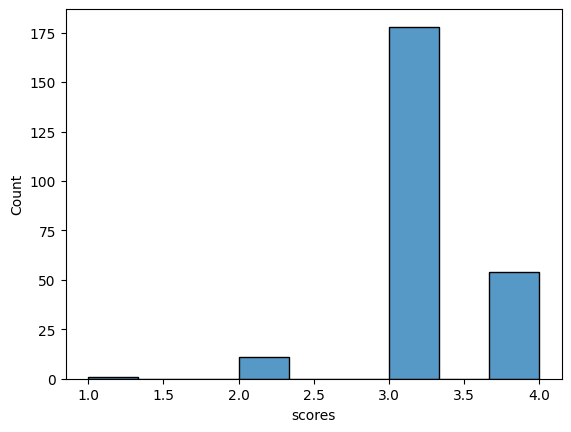

In [6]:
sb.histplot(not_used_pretrain, x="scores")

<Axes: xlabel='scores', ylabel='Count'>

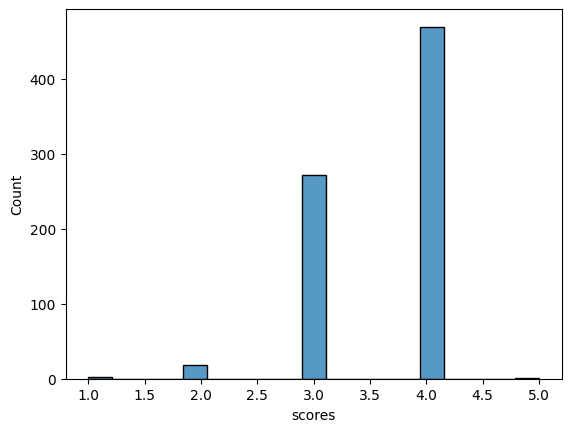

In [7]:
sb.histplot(ampscz_scores, x="scores")

score
4    24
3    18
Name: count, dtype: int64

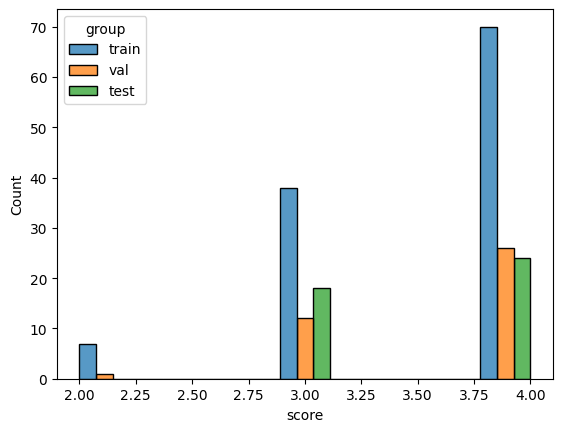

In [8]:
sb.histplot(finetune_df, x="score", hue="group", multiple="dodge")
finetune_df[finetune_df["group"] == "test"]["score"].value_counts()

/tmp/ipykernel_2676956/1419828739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_used_pretrain["score"] = not_used_pretrain["scores"]
/tmp/ipykernel_2676956/1419828739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_used_pretrain["group"] = "test"


score
3    178
4     53
2     12
Name: count, dtype: int64

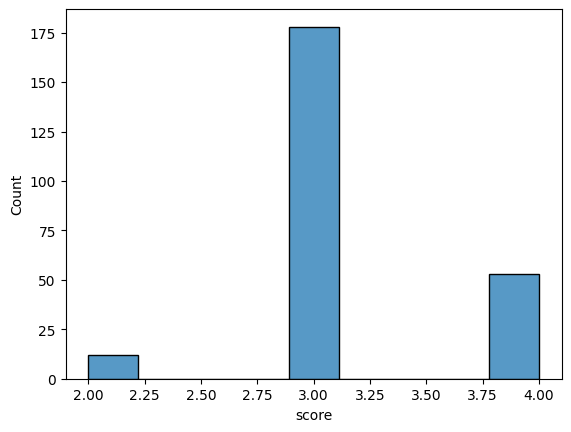

In [9]:
not_used_pretrain["score"] = not_used_pretrain["scores"]
not_used_pretrain["group"] = "test"
extra_df = not_used_pretrain.drop(columns="scores")
extra_df.loc[extra_df["score"] == 1, "score"] = 2


def get_data_path(row):
    matches = glob.glob(
        f'/home/at70870/local_scratch/AMPSCZ-Preproc/subjects/sub-{row["sub_id_gs"]}/ses-{row["ses_id_gs"]}/t1_linear/*-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz'
    )
    if len(matches) != 1:
        return "None"
    else:
        return matches[0].replace("/home/at70870/local_scratch/", "")


extra_df["data"] = extra_df.apply(get_data_path, axis=1)
extra_df = extra_df[extra_df["data"] != "None"]
sb.histplot(extra_df, x="score")
extra_df[extra_df["group"] == "test"]["score"].value_counts()

In [54]:
extra_df.to_csv("src/dataset/ampscz/extra.csv")

In [10]:
finetune_sites = finetune_df["site"].unique()
finetune_sites

array(['IR', 'MT', 'OR', 'PA', 'PV', 'SF', 'YA'], dtype=object)

In [19]:
new_vol = glob.glob("/home/at70870/local_scratch/AMPSCZ-test-Preproc/subjects/*/*")
subses = list(map(lambda x: x.split("/")[-2:], new_vol))
downloaded = pd.DataFrame(subses, columns=["subject", "session"])
downloaded

,subject,session
0,sub-YA76082,ses-202408051
1,sub-MT18844,ses-202311221
2,sub-YA48320,ses-202402271
3,sub-PA31481,ses-202407121
4,sub-YA11501,ses-202402071
...,...,...
177,sub-YA20566,ses-202402101
178,sub-YA48831,ses-202403211
179,sub-YA58745,ses-202406171
180,sub-YA58745,ses-202408221


In [18]:
new_scores = pd.read_csv("notebooks/test_sylvain_t1w_qc_query.csv", index_col=0)
new_scores["sub_id_gs"] = new_scores["subject"].str.removeprefix("sub-")
new_scores["ses_id_gs"] = new_scores["session"].str.removeprefix("ses-").astype(int)
new_scores["site"] = new_scores["sub_id_gs"].str[0:2]
new_scores = new_scores[new_scores["site"].isin(finetune_sites)]

result = new_scores.merge(
    finetune_df, on=["sub_id_gs", "ses_id_gs"], how="left", indicator=True
)
result = result[result["_merge"] == "left_only"].drop(columns=["_merge"])
result["score"] = result["qc_score"].apply(lambda x: 2 if x==1 else x)
result["group"] = "test"
result = result[["sub_id_gs", "ses_id_gs", "score", "group"]]
result["data"] = result.apply(
    lambda x: glob.glob(
        f"/home/at70870/local_scratch/AMPSCZ-test-Preproc/subjects/sub-{x['sub_id_gs']}/ses-{x['ses_id_gs']}/**/*_res-1x1x1_T1w.nii.gz"
    )[0],
    axis=1
)
result["data"]=result["data"].str.removeprefix("/home/at70870/local_scratch/")
result.to_csv("new_volume_for_test.csv")
result

,sub_id_gs,ses_id_gs,score,group,data
0,IR37610,202406021,3,test,AMPSCZ-test-Preproc/subjects/sub-IR37610/ses-2...
1,PA36031,202408021,4,test,AMPSCZ-test-Preproc/subjects/sub-PA36031/ses-2...
7,IR15777,202405231,3,test,AMPSCZ-test-Preproc/subjects/sub-IR15777/ses-2...
9,IR24637,202312191,4,test,AMPSCZ-test-Preproc/subjects/sub-IR24637/ses-2...
10,YA52430,202405061,4,test,AMPSCZ-test-Preproc/subjects/sub-YA52430/ses-2...
...,...,...,...,...,...
363,PA20173,202403191,3,test,AMPSCZ-test-Preproc/subjects/sub-PA20173/ses-2...
365,YA58745,202406171,3,test,AMPSCZ-test-Preproc/subjects/sub-YA58745/ses-2...
366,SF08827,202406101,3,test,AMPSCZ-test-Preproc/subjects/sub-SF08827/ses-2...
368,PV37487,202402121,3,test,AMPSCZ-test-Preproc/subjects/sub-PV37487/ses-2...


score
4    101
3     72
2      9
Name: count, dtype: int64

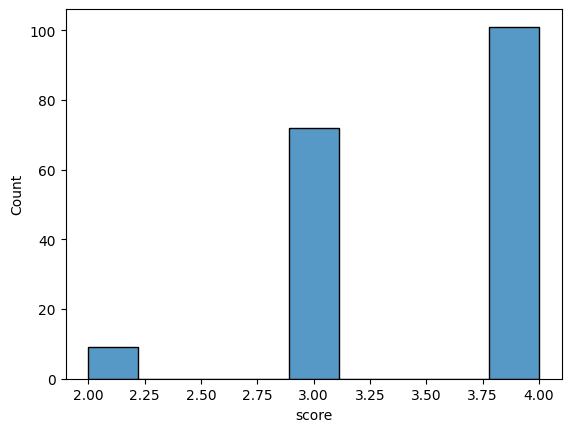

In [19]:
sb.histplot(result, x="score")
result["score"].value_counts()

In [20]:
result[result["sub_id_gs"] == "IR00124"]

,subject,session,qc_score,qc_notes,qc_created_at,qc_by,qc_review_requested,sub_id_gs,ses_id_gs,site_x,timepoint_gs,score,comment,sub-ses,site_y,motion,group,data
